# Cuisine Classification 

## Step 1: Load and Explore the Dataset

In [14]:
import pandas as pd

# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Step 2: Preprocess the Dataset

### 2.1. Handle Missing Values and Encode Categorical Variables

In [15]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop columns that are not relevant for cuisine classification
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 
                   'Locality Verbose', 'Longitude', 'Latitude', 'Currency', 'Has Table booking', 
                   'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 
                   'Rating text', 'Votes']
data = data.drop(columns=columns_to_drop)

# Handle missing values if any (here we drop rows with missing 'Cuisines')
data = data.dropna(subset=['Cuisines'])

# Encode the 'Cuisines' column (multi-label binarizer)
from sklearn.preprocessing import MultiLabelBinarizer

# Split the 'Cuisines' column into a list of cuisines
data['Cuisines'] = data['Cuisines'].apply(lambda x: x.split(', '))

mlb = MultiLabelBinarizer()
cuisines_encoded = mlb.fit_transform(data['Cuisines'])
cuisines_df = pd.DataFrame(cuisines_encoded, columns=mlb.classes_)
data = data.join(cuisines_df).drop(columns=['Cuisines'])

# Display the preprocessed data
data.head()


Missing Values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


,Average Cost for two,Price range,Aggregate rating,Afghani,African,American,Andhra,Arabian,Argentine,Armenian,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,1100,3,4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1200,3,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4000,4,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1500,4,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1500,4,4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 3: Split the Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) and labels (y)
X = data.drop(columns=mlb.classes_)
y = data[mlb.classes_]

# Check for any NaN values in labels and drop corresponding rows in features and labels
non_nan_indices = ~y.isna().any(axis=1)
X = X[non_nan_indices]
y = y[non_nan_indices]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (7626, 3) (7626, 145)
Testing set shape: (1907, 3) (1907, 145)


## Step 4: Select and Train a Classification Algorithm

### 4.1. Train a Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Display the classifier parameters
print("Trained Random Forest Classifier:\n", classifier)


Trained Random Forest Classifier:
 RandomForestClassifier(random_state=42)


## Step 5: Evaluate the Model's Performance

### 5.1. Predict and Evaluate Using Classification Metrics

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the testing data
y_pred = classifier.predict(X_test)

# Calculate and display the classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.0273
Precision: 0.1928
Recall: 0.0763
F1 Score: 0.1036


c:\Users\racer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\racer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\racer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len

## Step 6: Analyze Model Performance Across Different Cuisines

### 6.1. Detailed Analysis of Performance Metrics per Cuisine

In [20]:
from sklearn.metrics import classification_report

# Generate a detailed classification report
report = classification_report(y_test, y_pred, target_names=mlb.classes_)
print("Classification Report:\n", report)


Classification Report:
                    precision    recall  f1-score   support

          Afghani       0.00      0.00      0.00         3
          African       0.00      0.00      0.00         0
         American       0.19      0.06      0.09        89
           Andhra       0.00      0.00      0.00         4
          Arabian       0.33      0.20      0.25         5
        Argentine       0.00      0.00      0.00         0
         Armenian       0.00      0.00      0.00         0
            Asian       0.00      0.00      0.00        39
     Asian Fusion       0.00      0.00      0.00         0
         Assamese       0.00      0.00      0.00         0
       Australian       0.00      0.00      0.00         0
           Awadhi       0.00      0.00      0.00         5
              BBQ       0.00      0.00      0.00        10
           Bakery       0.00      0.00      0.00       140
         Bar Food       0.00      0.00      0.00        12
          Belgian       0.00   

c:\Users\racer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\racer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\racer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

## Step 7: Save the Trained Model

In [24]:
import joblib

# Save the trained classifier to a file
model_filename = 'cuisine_classifier_model.pkl'
joblib.dump(classifier, model_filename)

# Save the column names used during training
columns_filename = 'model_columns.pkl'
joblib.dump(X.columns, columns_filename)

print(f"Model saved to {model_filename}")
print(f"Column names saved to {columns_filename}")


Model saved to cuisine_classifier_model.pkl
Column names saved to model_columns.pkl


## Step 8: Load the Model and Test with New Data

### 8.1. Load the Model

In [25]:
# Load the trained model from the file
loaded_classifier = joblib.load(model_filename)
print("Model loaded successfully")

# Load the column names used during training
model_columns = joblib.load(columns_filename)
print("Column names loaded successfully")


Model loaded successfully
Column names loaded successfully


### 8.2. Test the Model with New Data

In [27]:
# Sample new data for prediction (replace with actual new data)
new_data = {
    'Price range': [3],
    'Aggregate rating': [4.5],
    'Average Cost for two': [1000] 
}

# Convert the new data to a DataFrame
new_data_df = pd.DataFrame(new_data)

# Ensure the new data has the same columns as the training data
for col in model_columns:
    if col not in new_data_df.columns:
        new_data_df[col] = 0

new_data_df = new_data_df[model_columns]

# Predict the cuisines for the new data
new_predictions = loaded_classifier.predict(new_data_df)

# Convert predictions back to original cuisine labels
new_predictions_labels = mlb.inverse_transform(new_predictions)
print("Predicted Cuisines for new data:", new_predictions_labels)


Predicted Cuisines for new data: [('Cafe', 'Italian', 'Lebanese')]


## Step 9: Visualize Model Performance

### 9.1. Confusion Matrix
A confusion matrix helps visualize the performance of the classification model by comparing the actual labels to the predicted labels.

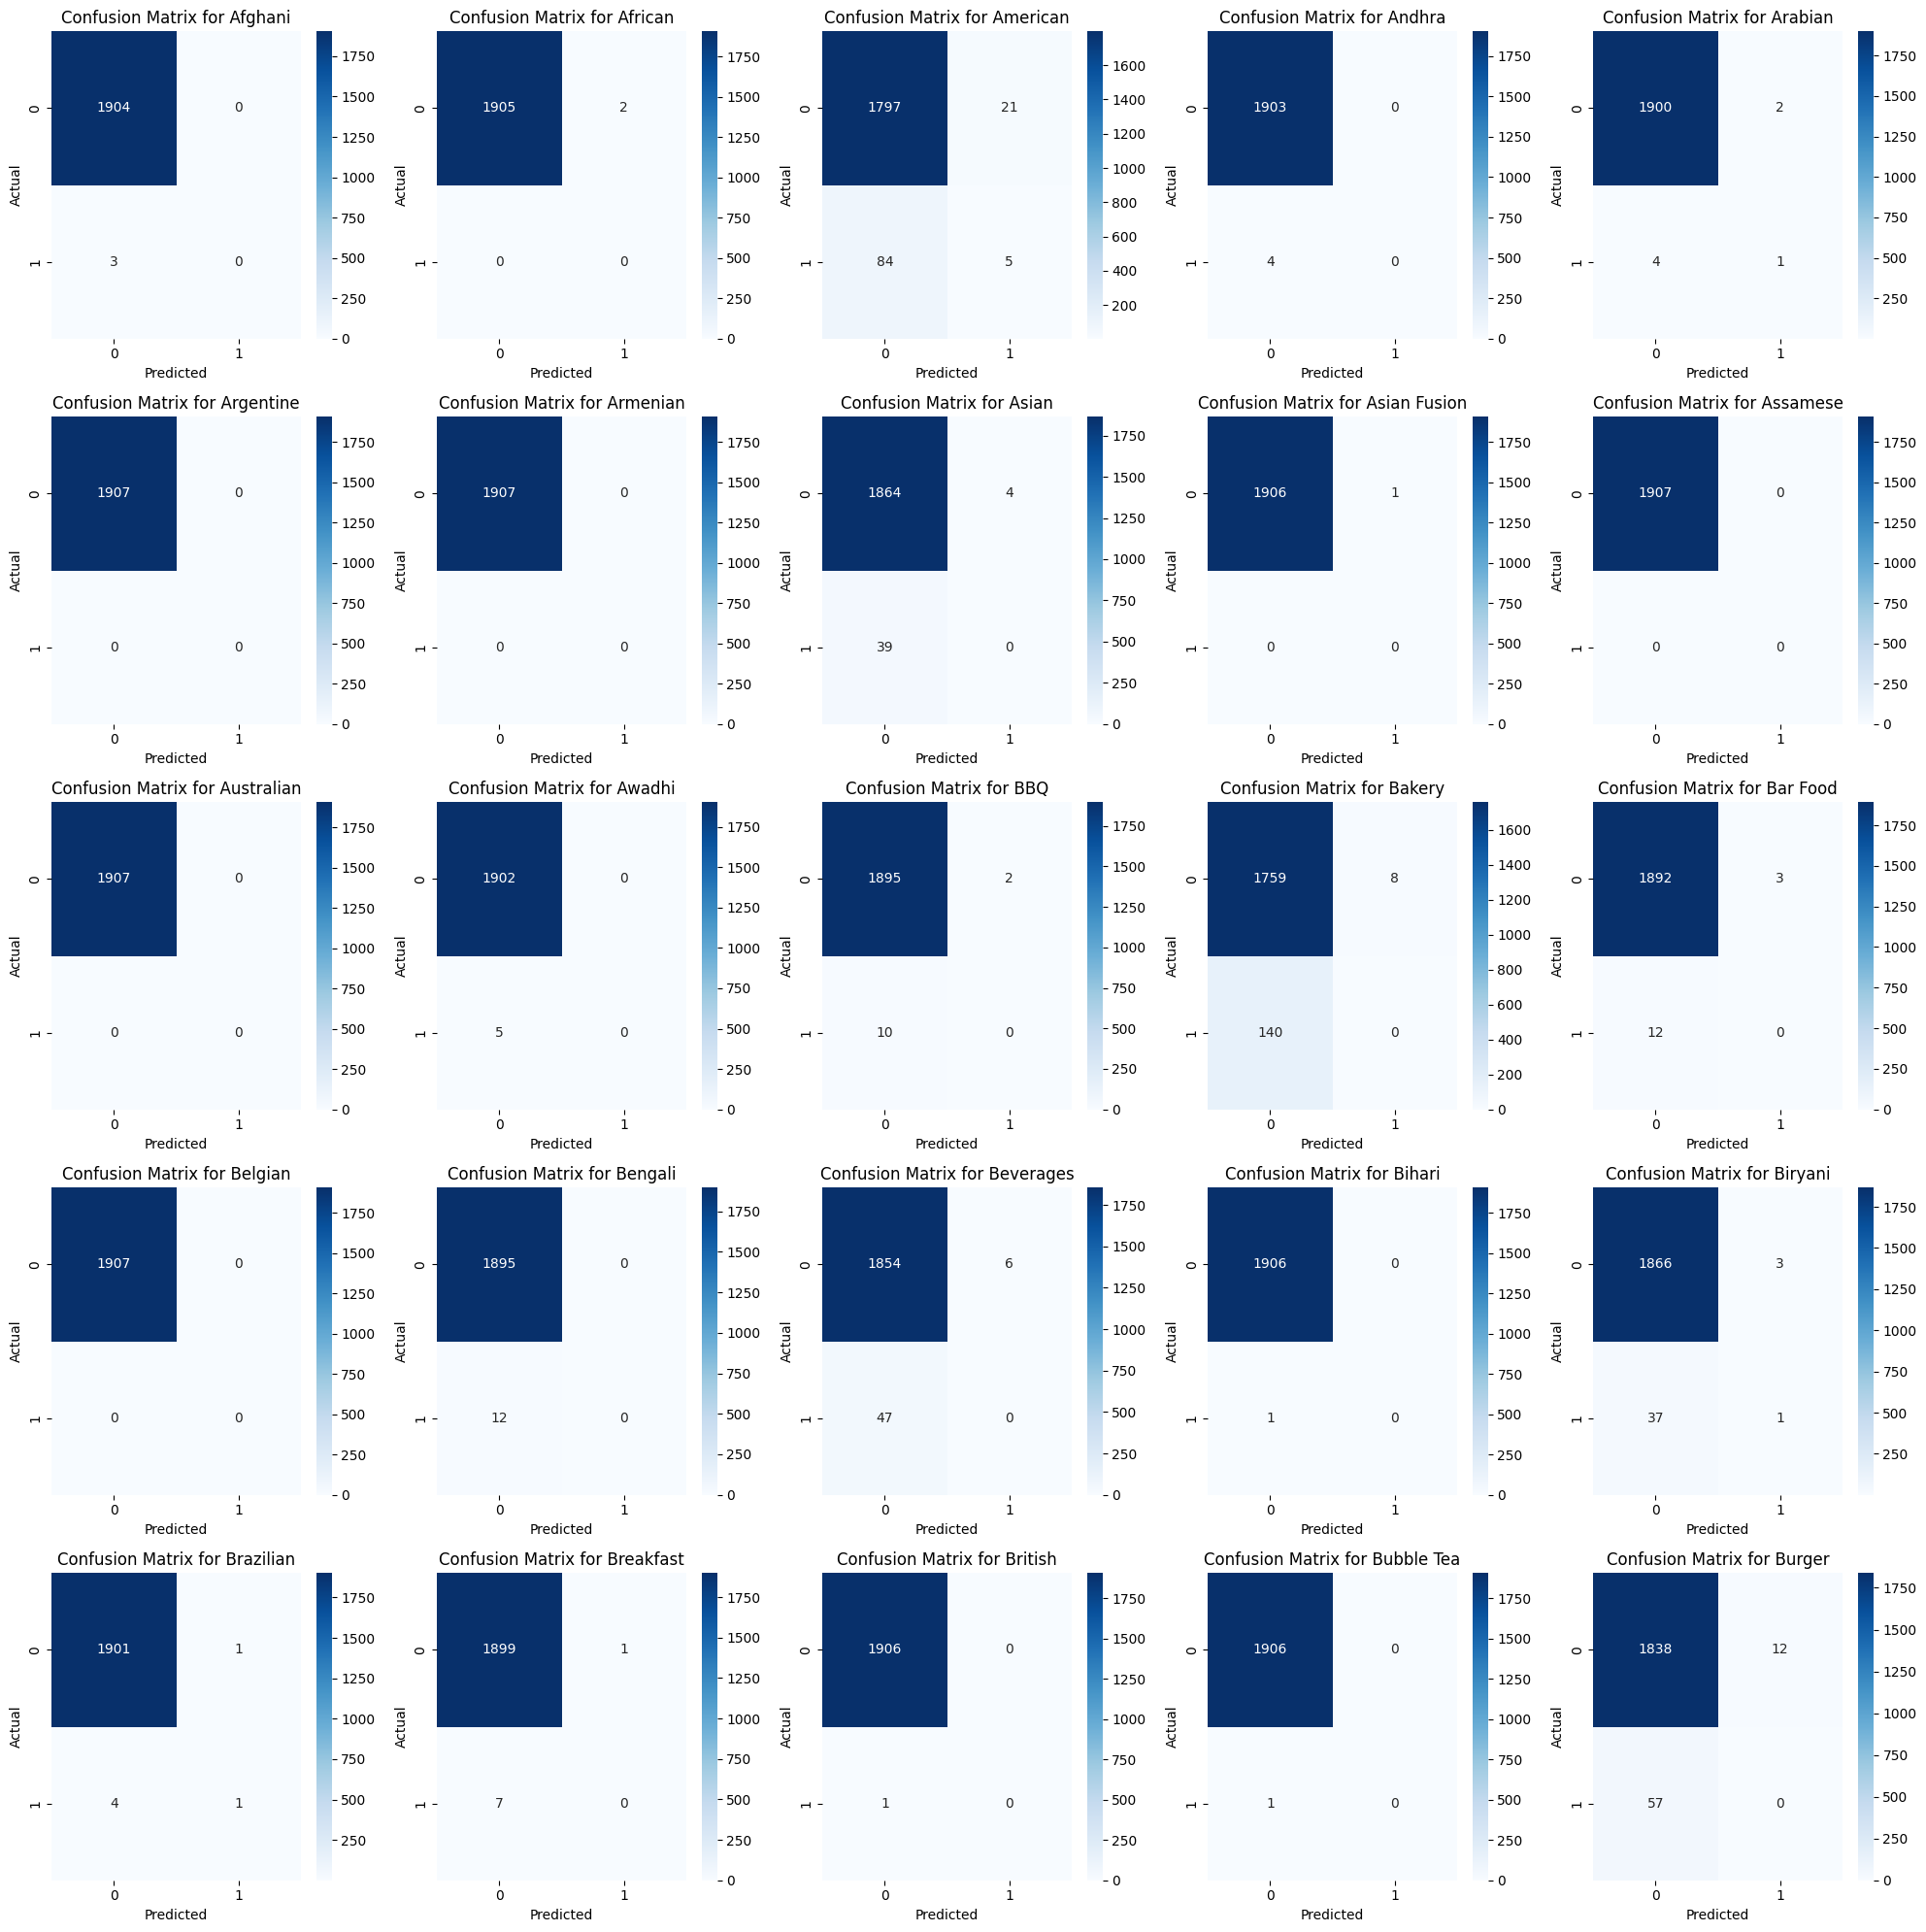

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Generate confusion matrix for each class
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Plot confusion matrices for each class
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
axes = axes.ravel()

for i, (ax, cm) in enumerate(zip(axes, confusion_matrices)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix for {mlb.classes_[i]}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


## Classification Report 

In [37]:
# Detailed Classification Report
report_dict = classification_report(y_test, y_pred, target_names=mlb.classes_, output_dict=True)

# Create a DataFrame from the classification report
report_df = pd.DataFrame(report_dict).transpose()

# Display the detailed classification report
print("Detailed Classification Report:\n", report_df)

# Optionally, you can save the report to a CSV file
report_df.to_csv('classification_report.csv', index=True)

Detailed Classification Report:
                precision    recall  f1-score  support
Afghani         0.000000  0.000000  0.000000      3.0
African         0.000000  0.000000  0.000000      0.0
American        0.192308  0.056180  0.086957     89.0
Andhra          0.000000  0.000000  0.000000      4.0
Arabian         0.333333  0.200000  0.250000      5.0
...                  ...       ...       ...      ...
World Cuisine   0.000000  0.000000  0.000000      1.0
micro avg       0.311526  0.076258  0.122524   3934.0
macro avg       0.032431  0.008769  0.012944   3934.0
weighted avg    0.192758  0.076258  0.103601   3934.0
samples avg     0.127871  0.080559  0.090710   3934.0

[149 rows x 4 columns]


c:\Users\racer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\racer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\racer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie